In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [125]:
data=pd.read_csv("Student_Marks.csv")
print(data.isna().sum())

time_study    0
Marks         0
dtype: int64


In [126]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [128]:
from sklearn.svm import SVR
model=SVR(kernel="rbf")
model.fit(x_train,y_train)

SVR()

In [129]:
y_pred=model.predict(x_test)

In [130]:
print(y_pred.ndim," -- ",y_pred.shape)
print(y_test.ndim," -- ",y_test.shape)

1  --  (20,)
1  --  (20,)


In [131]:
data1=pd.DataFrame({"Data-values":y_test,"Predict-Values":y_pred})
print(data1)

    Data-values  Predict-Values
0        12.647       11.705143
1        23.149       21.756473
2        13.811       17.277742
3        18.238       16.305130
4         6.217       11.322508
5        42.426       36.702733
6        30.548       31.973620
7         7.014       11.878566
8        53.158       39.847512
9        19.128       19.254824
10       36.653       34.177457
11       23.916       27.317266
12       49.544       39.816275
13       17.672       22.851853
14       17.264       18.558859
15       24.172       20.726676
16       12.209       12.986372
17       16.517       19.608073
18       39.965       37.336905
19       20.348       23.600206


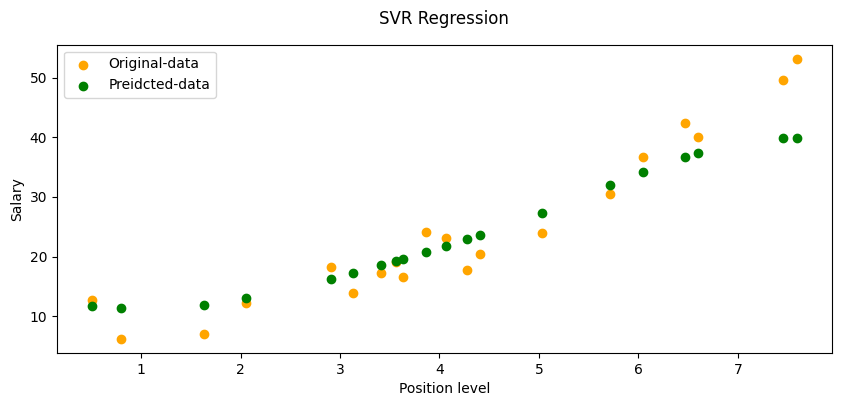

In [132]:
plt.figure(figsize=(10,4))
plt.scatter(x_test,y_test,color="orange",label="Original-data")
plt.scatter(x_test,y_pred,color="green",label="Preidcted-data")
plt.title('SVR Regression',pad=15)
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()

<ipython-input-133-b5c3aa3193f0>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid=np.arange(min(x),max(x),step=0.01)


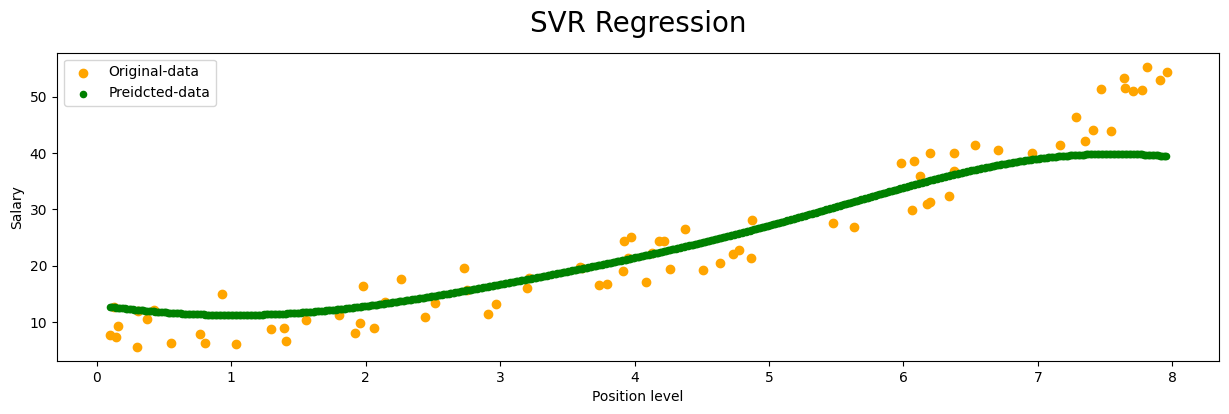

In [133]:
plt.figure(figsize=(15,4))
grid=np.arange(min(x),max(x),step=0.01)
grid=grid.reshape(-1,1)
plt.scatter(x_train,y_train,color="orange",label="Original-data")
plt.scatter(grid,model.predict(grid),color="green",s=20,label="Preidcted-data")
plt.title('SVR Regression',pad=15,size=20)
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()

In [134]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R-Square : ",r2_score(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
print("Squared Mean Squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))

R-Square :  0.8679364301015227
Mean Squared Error :  23.031510151012263
Mean absolute error :  3.678179246809852
Squared Mean Squared error :  4.799115559247586
